In [10]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
import os
from IPython.display import clear_output
import pandas as pd

In [11]:
# Set filepath
repository='/home/ebb505/ARE_Project/are-logs/'
replicate='lc_nsms_8_6_13-25-12-2636/'
filename='MD_Matrix_Proto.csv'
filepath=repository+replicate+filename
print('Filepath: ' + filepath)
AREPuckFilePath='/home/ebb505/ARE_Project/are-logs/Descriptors2/ARE-Puck/'+filename
AREPotatoFilePath='/home/ebb505/ARE_Project/are-logs/Descriptors2/ARE-Potato/'+filename
ARETricycleFilePath='/home/ebb505/ARE_Project/are-logs/Descriptors2/ARE-Tricycle/'+filename
oFile='sortedSpa.csv'

Filepath: /home/ebb505/ARE_Project/are-logs/lc_nsms_8_6_13-25-12-2636/MD_Matrix_Proto.csv


In [12]:
# Import data from csv
my_list = []
with open(filepath, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_list.append(row[1:-1]) # Last character is empty for some reason
# Import hand-made robots
my_robot = []
with open(AREPuckFilePath, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_robot.append(row[1:]) # Last character is empty for some reason        
with open(AREPotatoFilePath, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_robot.append(row[1:]) # Last character is empty for some reason        
with open(ARETricycleFilePath, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_robot.append(row[1:]) # Last character is empty for some reason   

In [13]:
# Estimate average for each generation
population = 25
matrixSize = 13
voxelsNumber = matrixSize*matrixSize*matrixSize
evaluations = int(len(my_list)/matrixSize)
featureSize = len(my_list[0])
generations = int(evaluations / population)

interval=25
rangeValues = range(0,evaluations,interval)
lenRange = len(rangeValues)

print("Number of evaluations: ", evaluations, "Features size: ", featureSize, "Generations: ", generations)
dat = np.array([[float(y) for y in x] for x in my_list]) # Convert to array
robotDat = np.array([[float(y) for y in x] for x in my_robot]) # Convert to array

Number of evaluations:  16475 Features size:  156 Generations:  659


In [43]:
print(len(dat))

214175


In [14]:
robotList = []
for i in range(0,len(dat),matrixSize):
    robot = []
    for j in range(matrixSize):
        robot.append(dat[i+j])
    #robotList.append(robot)    
    robotList.append(np.array([[float(y) for y in x] for x in robot]))

In [37]:
print(len(robotList))
print(len(robotList[0]))
print(len(robotList[0][0]))
print(robotList[2][0])

16475
13
156
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [38]:
robotListArray = np.array([[float(y) for y in x] for x in robotList]) # Convert to array

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
temp = np.linalg.norm(robotList[0]-robotList[1])
print(temp)

In [15]:
# Compare with hand-made robots
temRobot = []
for i in range(len(robotList)):
    temDis = []
    temAve = []
    print(i/len(robotList))
    for j in range(len(robotList)):
        dist = np.linalg.norm(robotList[i]-robotList[j])
        temDis.append(dist)
    sortedList = np.sort(temDis)
    temAve.append(np.mean(sortedList[:14]))
    temRobot.append(temAve)
    
    clear_output(wait=True)

0.9999393019726859


In [ ]:
# Progress ALL robots
progressSparseness = []
progressAREPuck = []
progressAREPotato = []
progressARETricycle = []
for i in range(population,evaluations,population):
    progressSparseness.append(np.mean(temRobot[:i]))
    progressAREPuck.append(temRobot[0][i])
    progressAREPotato.append(temRobot[1][i])
    progressARETricycle.append(temRobot[2][i])

In [ ]:
# Plot stuff
xValues = list(range(population, evaluations, population))
xValues = [x/population for x in xValues]
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}

plt.rc('font', **font)
plt.figure(0)

plt.plot(xValues, progressAREPuck, '-*', color='orange',  linewidth=2.5)
plt.plot(xValues, progressAREPotato, '--', color='red',  linewidth=2.5)
plt.plot(xValues, progressARETricycle, '-', color='blue',  linewidth=2.5)
plt.plot(xValues, progressSparseness, '-', color='black',  linewidth=2.5)

plt.xlabel('Evaluations')
plt.ylabel('Sparseness')

axes = plt.gca()
axes.set_ylim([0,0.6])

rangeX = range(0,lenRange*5000,5000) # Why are these offsets necessary?
posX = range(0,lenRange,200) # Why are these offsets necessary?
plt.xticks(posX,rangeX)
plt.legend(['ARE-Puck', 'ARE-Potato', 'ARE-Tricycle', 'Evolved robots'])
plt.title('Trait descriptor')

plt.savefig(repository+replicate+'TraitSparseness.png',dpi=200)

In [16]:
myList = []
for i in range(len(temRobot)):
    myList.append([i,temRobot[i]])

def takeSecond(elem):
    return elem[1]

myList.sort(key=takeSecond, reverse=True)

In [17]:
# Save to CSV
with open(repository + replicate + oFile, 'w', newline='') as write_obj:
    csv_writer = csv.writer(write_obj)
    for i in range(len(myList)):
        csv_writer.writerow(myList[i])

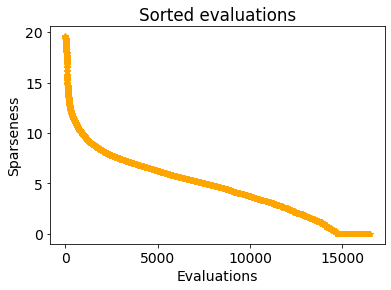

In [18]:
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}

plt.rc('font', **font)
plt.figure(0)

plt.plot([row[1] for row in myList], '-*', color='orange',  linewidth=2.5)
plt.xlabel('Evaluations')
plt.ylabel('Sparseness')
plt.title('Sorted evaluations')
plt.savefig(repository+replicate+'SortedEvaluations.png',dpi=200)